# Versuch 241: Wechselstromeigenschaften von RLC-Gliedern

## Auswertung der Messergebnisse 

In [1]:
#import packages
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2

In [2]:
#fit function
#function1
def function(freq,freq_grenz):
    return np.arctan(freq_grenz/freq)*(360/(2*np.pi))

### Teil 1: Bestimmung der Zeitkonstante eines RC-Glieds

In [3]:
#determining half-life of voltage for each composition

R = np.array([1000, 10000, 1000]) #resistor
R_err = R*0.05
C = np.array([470, 4.7, 47])*1e-9 #capacitor
C_err = 0.1*C
Thw = np.array([320, 31, 34])*1e-6 #half-life
Thw_err = np.array([20, 2, 2])*1e-6

In [4]:
#half life of current
C2=47e-9
C2_err=0.1*C2

R2=R[0]
R2_err=R_err[0]

Thw2=30.8*1e-6
Thw2_err=1e-6

In [5]:
#theoretical value for tau

tau_theo = R*C 
tau_theo_err=np.sqrt((C*R_err)**2+(R*C_err)**2)

print('Für die theoretischen Werte wurde ermittelt:')
print('tau_theo = ' + str(tau_theo) + ' +/- ' + str(tau_theo_err))

Für die theoretischen Werte wurde ermittelt:
tau_theo = [  4.70000000e-04   4.70000000e-05   4.70000000e-05] +/- [  5.25475975e-05   5.25475975e-06   5.25475975e-06]


In [6]:
#experimental value of tau

tau_exp=Thw/np.log(2)
tau_exp_err=Thw_err/np.log(2)

print('Für die experimentellen Werte wurde ermittelt:')
print('tau_exp = ' + str(tau_exp) + ' +/- ' + str(tau_exp_err))

Für die experimentellen Werte wurde ermittelt:
tau_exp = [  4.61662413e-04   4.47235463e-05   4.90516314e-05] +/- [  2.88539008e-05   2.88539008e-06   2.88539008e-06]


In [7]:
#comparison between theory and experiment
diff_tau=np.abs(tau_theo-tau_exp)
diff_tau_err=np.sqrt((tau_theo_err)**2+(tau_exp_err)**2)

print('Der Vergleich der theoretischen und experimentellen Werte liefert:')
print('∆(tau) = ' + str(diff_tau) + ' +/- ' + str(diff_tau_err)+' => Sigma= '+str(diff_tau/diff_tau_err))

Der Vergleich der theoretischen und experimentellen Werte liefert:
∆(tau) = [  8.33758692e-06   2.27645373e-06   2.05163139e-06] +/- [  5.99482910e-05   5.99482910e-06   5.99482910e-06] => Sigma= [ 0.13907964  0.37973622  0.34223351]


In [8]:
#further comparison: half-life with current measurement
tau_theo2=R2*C2
tau_theo2_err=np.sqrt((C2*R2_err)**2+(R2*C2_err)**2)

tau_exp2=Thw2/np.log(2)
tau_exp2_err=Thw2_err/np.log(2)

print('Aus der Strommessung ergeben sich die folgenden Werte:')
print('tau_theo_I = ' + str(tau_theo2) + ' +/- ' + str(tau_theo2_err))
print('tau_exp_I = ' + str(tau_exp2) + ' +/- ' + str(tau_exp2_err))
print()

diff_tau2=np.abs(tau_theo2-tau_exp2)
diff_tau2_err=np.sqrt((tau_theo2_err)**2+(tau_exp2_err)**2)

print('Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:')
print('∆(tau2) = ' + str(diff_tau2) + ' +/- ' + str(diff_tau2_err)+' => Sigma= '+str(diff_tau2/diff_tau2_err))

Aus der Strommessung ergeben sich die folgenden Werte:
tau_theo_I = 4.7e-05 +/- 5.25475974712e-06
tau_exp_I = 4.44350072594e-05 +/- 1.44269504089e-06

Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:
∆(tau2) = 2.56499274062e-06 +/- 5.44920810586e-06 => Sigma= 0.470709264684


### Teil 3: Frequenz- und Phasengang eines RC-Glieds

In [9]:
#determining cut-off frequenze with the circuit analyzer

#lowpass
freq_grenz_tp=3.12*1e3 #Hz
freq_grenz_tp_err=0.15*1e3

#highpass
freq_grenz_hp=3.21*1e3
freq_grenz_hp_err=freq_grenz_tp_err

#### Phasengang am Hochpass

In [10]:
#frequencies
freq=1e3*np.array([1,2,3,4,5,6,7,8,9,10])

#time difference
delta_t=1e-6*np.array([199, 81, 45, 28, 19.4, 13.3, 9.9, 7.8, 6.2, 4.9])
delta_t_err=1e-6*np.array([5, 2, 3, 2, 1, 0.5, 0.5, 0.4, 0.3, 0.3])

#phase difference
phi=360*freq*delta_t
phi_err=phi*np.sqrt((delta_t_err/delta_t)**2)

Der Fit liefert eine Grenzfrequenz von freq_g = 3285.61284915 +/- 30.9010779158


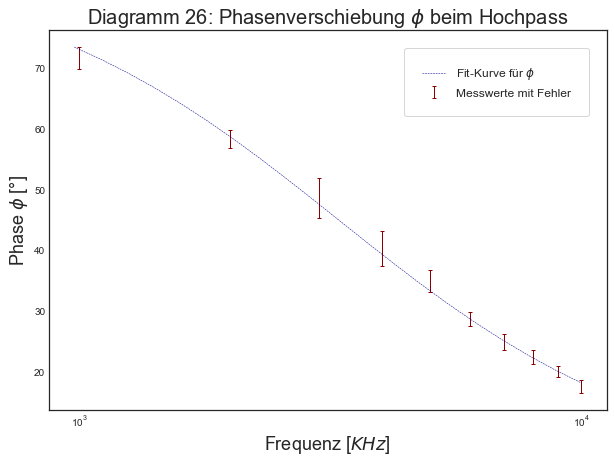

In [11]:
#fit function to data
popt,pcov=curve_fit(function,freq,phi,sigma=phi_err)
perr = np.sqrt(np.diag(pcov))
freq_g=popt[0]
freq_g_err=perr[0]

print('Der Fit liefert eine Grenzfrequenz von freq_g = '+str(freq_g)+' +/- '+str(freq_g_err))

#plot itfunction and data
x=np.logspace(2.99, 4, 20)
plt.xscale('log')
plt.errorbar(freq,phi,yerr=phi_err,linewidth=1,linestyle='',color='darkred',label='Messwerte mit Fehler')
plt.xlabel('Frequenz ['+'$KHz$]', size=18)
plt.ylabel('Phase'+ ' '+r'$\phi$' + r' [°]' , size=18)
plt.title(r'Diagramm 26: Phasenverschiebung $\phi$ beim Hochpass ', size=20)
plt.plot(x,function(x,popt[0]),color='darkblue',linewidth=0.5,linestyle='--',label=r'Fit-Kurve für $\phi$')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.savefig('Diagramme/V241Diagramm20.pdf', format='PDF')

In [12]:
#camparing theoretical and experimental (from fit) cut-off frequencie
print('Aus dem Fit ergibt sich die folgende Grenzfrequenz:')
print('freq_g = ' + str(freq_g) + ' +/- ' + str(freq_g_err))
print()

diff_freq_g=np.abs(freq_g-freq_grenz_hp)
diff_freq_g_err=np.sqrt((freq_g_err)**2+(freq_grenz_hp_err)**2)

print('Für die Differenz Theorie-Experiment folgt somit:')
print('∆(freq_g) = '+str(diff_freq_g)+' +/- '+str(diff_freq_g_err)+' => Sigma= '+str(diff_freq_g/diff_freq_g_err))

Aus dem Fit ergibt sich die folgende Grenzfrequenz:
freq_g = 3285.61284915 +/- 30.9010779158

Für die Differenz Theorie-Experiment folgt somit:
∆(freq_g) = 75.6128491466 +/- 153.1498502 => Sigma= 0.493718074472


In [13]:
#comparing measured and teoretical cut-off frequencie
freq_g_theo=1/(2*np.pi*R[0]*C[2])
freq_g_theo_err=freq_g_theo*((R_err[0]/R[0])**2+(C_err[2]/C[2])**2)**0.5

diff_freq_g_hp=np.abs(freq_g_theo-freq_grenz_hp)
diff_freq_g_hp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_hp_err)**2)

diff_freq_g_tp=np.abs(freq_g_theo-freq_grenz_tp)
diff_freq_g_tp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_tp_err)**2)

print('Für die Differenz Theorie-Experiment folgt somit für den Hochpass:')
print('∆(freq_g_hp) = '+str(diff_freq_g_hp)+' +/- '+str(diff_freq_g_hp_err)+' => Sigma= '+str(diff_freq_g_hp/diff_freq_g_hp_err))
print()

print('Für die Differenz Theorie-Experiment folgt somit für den Tiefpass:')
print('∆(freq_g_tp) = '+str(diff_freq_g_tp)+' +/- '+str(diff_freq_g_tp_err)+' => Sigma= '+str(diff_freq_g_tp/diff_freq_g_tp_err))

Für die Differenz Theorie-Experiment folgt somit für den Hochpass:
∆(freq_g_hp) = 176.275384934 +/- 407.22937306 => Sigma= 0.432865104031

Für die Differenz Theorie-Experiment folgt somit für den Tiefpass:
∆(freq_g_tp) = 266.275384934 +/- 407.22937306 => Sigma= 0.653870772958


### Teil 4: Frequenzgang eines Serienschwingkreises

#### Bestimmung der Induktivität $L_1$

In [14]:
omega_res=2*np.pi*np.array([3.58e3,3.65e3,3.63e3])
omega_res_err=2*np.pi*np.array([0.1e3,0.05e3,0.04e3])

omega_res_mean=np.mean(omega_res)
omega_res_mean_err=1/3*np.sum(omega_res_err**2)**0.5
omega_res_mean_std=np.std(omega_res)/np.sqrt(len(omega_res))

print('Die Grenzfrequenz wurde bestimmt auf:')
print(str(omega_res_mean) + ' +/- ' + str(omega_res_mean_err) + ' +/- ' + str(omega_res_mean_std) + ' s^-1')

Die Grenzfrequenz wurde bestimmt auf:
22745.130812 +/- 248.695639112 +/- 106.793614963 s^-1


In [15]:
#With omega_res=sqrt(1/(L*C)) follows

L1=1/(omega_res_mean**2*C[2])
L1_err=L1*np.sqrt((2*omega_res_mean_err/omega_res_mean)**2+(C_err[2]/C[2])**2)
L1_std=L1*np.sqrt((2*omega_res_mean_std/omega_res_mean)**2+(C_err[2]/C[2])**2)

print('Aus der ermittelten Grenzfrequenz folgt für die Induktivität:')
print('L1 = ' + str(L1) + ' +/- ' + str(L1_err) + ' +/- ' + str(L1_std) + ' H')

Aus der ermittelten Grenzfrequenz folgt für die Induktivität:
L1 = 0.0411268326808 +/- 0.00420987142012 +/- 0.0041307764395 H


#### Bestimmung des Verlustwiederstandes $R_V$

In [16]:
#As given ∆omega=(R+Rv)/L1

delta_omega=2*np.pi*np.array([4.5e3,1.34e3,0.62e3])
delta_omega_err=2*np.pi*np.array([0.2e3,0.2e3,0.1e3])
R=np.array([1000,220,47])
R_err=0.05*R

print(delta_omega)
print(delta_omega_err)

R_v=delta_omega*L1-R
R_v_err=np.sqrt((delta_omega_err*L1)**2+(delta_omega*L1_err)**2+(R_err)**2)

R_ges=R+R_v
R_ges_err=np.sqrt(R_err**2+R_v_err**2)

print('Der Verlustwiderstand des jew. Schwingkreises beträgt')
print('Rv = ' + str(R_v) + ' Ohm')
print(' +/- ' + str(R_v_err) + ' Ohm')
print()
print('Daraus folgt für den jew. Gesamtwiderstand R + Rv:')
print('R + Rv = ' + str(R_ges) + ' Ohm')
print(' +/-     ' + str(R_ges_err) + ' Ohm')

[ 28274.33388231   8419.46831162   3895.57489045]
[ 1256.63706144  1256.63706144   628.31853072]
Der Verlustwiderstand des jew. Schwingkreises beträgt
Rv = [ 162.83379874  126.26606451  113.21265672] Ohm
 +/- [ 139.06628081   63.62638694   30.69564518] Ohm

Daraus folgt für den jew. Gesamtwiderstand R + Rv:
R + Rv = [ 1162.83379874   346.26606451   160.21265672] Ohm
 +/-     [ 147.78169866   64.57024946   30.78546951] Ohm


#### Zusatzaufgabe für Physiker: Verlustwiderstand aus Spannungsmessung

In [17]:
#As given U_A = R/(R+Rv)*U_E

U_E=np.array([0.96, 0.93, 0.92])
U_E_err=0.01*np.ones(3)

U_A=np.array([0.92, 0.71, 0.30])
U_A_err=0.03*np.ones(3)

R_v2=R*(U_E/U_A-1)
R_v2_err=np.sqrt((R_err*(U_E/U_A-1))**2+(R*U_E_err/U_A)**2+(R*U_E*U_A_err/U_A**2)**2)

R_ges2=R+R_v2
R_ges2_err=np.sqrt(R_err**2+R_v2_err**2)

print('Aus der Spannungsmessung folgt für den jew. Verlustwiderstand: ')
print('Rv = ' + str(R_v2) + ' Ohm')
print(' +/- ' + str(R_v2_err) + ' Ohm')
print()
print('Für den Gesamtwiderstand folgt somit:')
print('R + Rv = ' + str(R_ges2) + ' Ohm')
print(' +/-     ' + str(R_ges2_err) + ' Ohm')

Aus der Spannungsmessung folgt für den jew. Verlustwiderstand: 
Rv = [ 43.47826087  68.16901408  97.13333333] Ohm
 +/- [ 35.7865012   13.01835509  15.29005668] Ohm

Für den Gesamtwiderstand folgt somit:
R + Rv = [ 1043.47826087   288.16901408   144.13333333] Ohm
 +/-     [ 61.48718296  17.04340251  15.46959383] Ohm


### Teil 5: Bestimmung der Dämpfungskonstanten eines freien, gedämpften Schwingkreises

#### Bestimmung der Induktivität der Spule

In [18]:
#resonant frequency
L1_2=1/(omega_res[2]**2*C[2])
L1_2_err=L1_2*np.sqrt((2*omega_res_err[2]/omega_res[2])**2+(C_err[2]/C[2])**2)

print('Aus der in Aufgabenteil 4 ermittelten Resonanzfrequenz folgt:')
print('L1 = ' + str(L1_2) + ' +/- ' + str(L1_2_err) + ' H')

Aus der in Aufgabenteil 4 ermittelten Resonanzfrequenz folgt:
L1 = 0.0409005506745 +/- 0.00418820409834 H


#### Logarithmisches Dekrement

In [21]:
A=np.array([1.73, 1.06, 0.67, 0.42, 0.27]) #Volt
A_err=0.03*np.ones(5)

Lambda=[]
Lambda_err=[]
for i in range(4):
    Lambda.append(np.log(A[i]/A[i+1]))
    Lambda_err.append(np.sqrt((A_err[0]/A[i])**2+(A_err[0]/A[i+1])**2))

Lambda_err=np.array(Lambda_err)
Lambda_mean=np.mean(Lambda)
Lambda_mean_err=1/3*np.sum(Lambda_err**2)**0.5
Lambda_mean_std=np.std(Lambda)/np.sqrt(len(Lambda))
print('Das logarithmische Dekrement berechnet sich zu:')
print('Lambda = ' + str(Lambda_mean) + ' +/- ' + str(Lambda_mean_err) + ' +/- ' + str(Lambda_mean_std))

Das logarithmische Dekrement berechnet sich zu:
Lambda = 0.464363682123 +/- 0.0562358798662 +/- 0.00864561902252


#### Gesamtwiderstand

In [22]:
#as said in the script
T=1.5e-3/4
T_err=0.03e-3/4
R_ges3=2*L1_2*Lambda_mean/T
R_ges3_err=R_ges3*np.sqrt((L1_2_err/L1_2)**2+(Lambda_mean_err/Lambda_mean)**2+(T_err/T)**2)
R_ges3_std=R_ges3*np.sqrt((Lambda_mean_std/Lambda_mean)**2)

print('Der damit ermittelte Gesamtwiderstand berechnet sich zu:')
print('R_ges = ' + str(R_ges3) + ' +/- ' + str(R_ges3_err))

Der damit ermittelte Gesamtwiderstand berechnet sich zu:
R_ges = 101.294561664 +/- 16.1918203414


#### Vergleich mit den Ergebnissen aus Aufgabe 4

In [23]:
diff_R_ges1=np.abs(R_ges[2]-R_ges3)
diff_R_ges1_err=np.sqrt((R_ges_err[2])**2+(R_ges3_err)**2)

diff_R_ges2=np.abs(R_ges2[2]-R_ges3)
diff_R_ges2_err=np.sqrt((R_ges2_err[2])**2+(R_ges3_err)**2)

print('Für die Differenz zu den beiden Werten aus Aufgabe 4 folgt somit:')
print('∆(R_ges1) = '+str(diff_R_ges1)+' +/- '+str(diff_R_ges1_err)+' => Sigma= '+str(diff_R_ges1/diff_R_ges1_err))
print('∆(R_ges2) = '+str(diff_R_ges2)+' +/- '+str(diff_R_ges2_err)+' => Sigma= '+str(diff_R_ges2/diff_R_ges2_err))

Für die Differenz zu den beiden Werten aus Aufgabe 4 folgt somit:
∆(R_ges1) = 58.9180950508 +/- 34.7839068927 => Sigma= 1.69383201354
∆(R_ges2) = 42.8387716689 +/- 22.3938245796 => Sigma= 1.91297254815


### Teil 6: Resonanzüberhöhung

#### Resonanzfrequenzen am Serienschwingkreis

In [24]:
#theoretical values
omega_res_R_theo=1/np.sqrt(L1*C[2])
omega_res_R_theo_err=omega_res_R_theo*np.sqrt((0.5*C_err[2]/C[2])**2+(0.5*L1_err/L1)**2)

print('Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: ')
print('omega_res_R_theo = ' + str(omega_res_R_theo) + ' +/- ' + str(omega_res_R_theo_err))
print()
omega_res_C_theo=np.sqrt(omega_res_R_theo**2-0.5*(R[1]/L1)**2)
omega_res_C_theo_err=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+(R[1]*R_err[1]/L1**2)**2+(R[1]**2*L1_err/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: ')
print('omega_res_C_theo = ' + str(omega_res_C_theo) + ' +/- ' + str(omega_res_C_theo_err))
print()

omega_res_L_theo=np.sqrt(omega_res_R_theo**2+0.5*(R[1]/L1)**2)
omega_res_L_theo_err=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+(R[1]*R_err[1]/L1**2)**2+(R[1]**2*L1_err/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: ')
print('omega_res_L_theo = ' + str(omega_res_L_theo) + ' +/- ' + str(omega_res_L_theo_err))

Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: 
omega_res_R_theo = 22745.130812 +/- 1627.43798628

Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: 
omega_res_C_theo = 22428.4069872 +/- 1652.01916684

Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: 
omega_res_L_theo = 23057.5044471 +/- 1606.94572605


In [25]:
#experimental resonant frequencies
omega_res_R=2*np.pi*3.78e3
omega_res_C=2*np.pi*3.66e3
omega_res_L=2*np.pi*3.94e3

omega_res2_err=2*np.pi*0.1e3

#### Vergleich der Werte

In [26]:
diff_omega_R=np.abs(omega_res_R_theo-omega_res_R)
diff_omega_C=np.abs(omega_res_C_theo-omega_res_C)
diff_omega_L=np.abs(omega_res_L_theo-omega_res_L)

diff_omega_R_err=np.sqrt(omega_res_R_theo_err**2+omega_res2_err**2)
diff_omega_C_err=np.sqrt(omega_res_C_theo_err**2+omega_res2_err**2)
diff_omega_L_err=np.sqrt(omega_res_L_theo_err**2+omega_res2_err**2)

print('Der Vergleich aus Messwert und Theorie liefert:')
print()
print('∆omega_R = ' + str(diff_omega_R) + ' +/- ' + str(diff_omega_R_err))
print('=> Sigma = '+str(diff_omega_R/diff_omega_R_err)+'(syst.)')
print()
print('∆omega_C = ' + str(diff_omega_C) + ' +/- ' + str(diff_omega_C_err))
print('=> Sigma = '+str(diff_omega_C/diff_omega_C_err)+'(syst.)')
print()
print('∆omega_L = ' + str(diff_omega_L) + ' +/- ' + str(diff_omega_L_err))
print('=> Sigma = '+str(diff_omega_L/diff_omega_L_err)+'(syst.)')

Der Vergleich aus Messwert und Theorie liefert:

∆omega_R = 1005.30964915 +/- 1744.51671681
=> Sigma = 0.576268280757(syst.)

∆omega_C = 568.051237127 +/- 1767.47036854
=> Sigma = 0.321392226562(syst.)

∆omega_L = 1698.24566319 +/- 1725.41552749
=> Sigma = 0.984253147219(syst.)


### Teil 7: Bandsperre

In [27]:
#theoretical value
#omega_res_bs_theo=omega_res[0]
#omega_res_bs_theo_err=omega_res_err[0]
omega_res_bs_theo=omega_res_mean
omega_res_bs_theo_err=omega_res_mean_err


#experimental value
omega_res_bs=2*np.pi*3.73e3
omega_res_bs_err=2*np.pi*0.03e3
print(omega_res_bs_err)

188.49555921538757


#### Vergleich der Werte

In [28]:
diff_omega_bs=np.abs(omega_res_bs_theo-omega_res_bs)
diff_omega_bs_err=np.sqrt(omega_res_bs_err**2+omega_res_bs_theo_err**2)

print('Der Vergleich aus Messwert und Theorie liefert:')
print('∆omega_bs = ' + str(diff_omega_bs) + ' +/- ' + str(diff_omega_bs_err) + ' s^-1'+' => Sigma= '+str(diff_omega_bs/diff_omega_bs_err))

Der Vergleich aus Messwert und Theorie liefert:
∆omega_bs = 691.15038379 +/- 312.057842006 s^-1 => Sigma= 2.21481498221


### Teil 8: Signalformung

#### Vergleich der Dämpfung des $4 \ kHz$ - Signals

In [29]:
#U[V]=1V_rms*10**(L_U[dBV]/20) (script)

#s1: incoming signal, s2: highpass filter,s3: lowpass filter (RC), s4: lowpass filter (LC),
#s5: bandpass filter (R=1e3 Ohm), s6: bandpass filter (R=47 Ohm))
#f1=100.71 Hz, f2=3.6e3 Hz, f3=8e3 Hz

s1=10**(1/20*np.array([-2.5,-10.63,-15.94]))
s2=10**(1/20*np.array([-31.88,-13.75,-16.56]))
s3=10**(1/20*np.array([-2.50,14.38,-24.06]))
s4=10**(1/20*np.array([-2.65, 9.54, -27.02]))
s5=10**(1/20*np.array([-31.25,-11.56,-20.31]))
s6=10**(1/20*np.array([-51.56,-31.25,-40.63]))

#ratios to incoming signal
v1=s2/s1
v2=s3/s1
v3=s4/s1
v4=s5/s1
v5=s6/s1

print("Verhältnisse zum reinen Signal:")
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)
print()

#comparison to an undampened signal
v1_n=v1/v1[1]
v2_n=v2/v2[1]
v3_n=v3/v3[1]
v4_n=v4/v4[1]
v5_n=v5/v5[1]

print('"Normierte" Verhältnisse zum reinen Signal:')
print(v1_n)
print(v2_n)
print(v3_n)
print(v4_n)
print(v5_n)

Verhältnisse zum reinen Signal:
[ 0.03396253  0.6982324   0.93110788]
[  1.          17.80327909   0.39264494]
[  0.98287887  10.1976476    0.27925438]
[ 0.03651741  0.89846259  0.60464435]
[ 0.00352371  0.09311079  0.05827738]

"Normierte" Verhältnisse zum reinen Signal:
[ 0.04864072  1.          1.33352143]
[ 0.05616943  1.          0.02205464]
[ 0.0963829  1.         0.0273842]
[ 0.04064433  1.          0.67297666]
[ 0.03784426  1.          0.62589286]


#### Vergleich des $100 \ Hz$-Signals beim Hochpass mit Aufgabenteil 3

In [34]:
print("Durch den Hochpass wird das 100Hz-Signal auf "+str(round(100*v1[0],2))+"% gedämpft.")

#Die in Aufgabe 3 gemessene Dämpfung wird aus Diagramm 6 abgelesen (-21dB)
v_auf3=10**(-21/20)
print("In Aufgabe 3 ergab sich eine Dämpfung von ca. "+str(round(100*v_auf3,2))+"%.")

Durch den Hochpass wird das 100Hz-Signal auf 3.4% gedämpft.
In Aufgabe 3 ergab sich eine Dämpfung von ca. 8.91%.
